#####         Advanced Lane Finding Project

1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
1. Apply a distortion correction to raw images.
3. Use color transforms, gradients, etc., to create a thresholded binary image.
4. Apply a perspective transform to rectify binary image ("birds-eye view").
5. Detect lane pixels and fit to find the lane boundary.
6. Determine the curvature of the lane and vehicle position with respect to center.
7. Warp the detected lane boundaries back onto the original image.
8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

##### First thing i need to do is calibrate and undistort carmera. So when our camera takes 
#### image and it won't produce inapproraite images. 

In [2]:
def undistorted_img(image_path):
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img_drawed = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
        
        return mtx, dist

In [3]:
#### I have tried many but calibration1.jpg doesnt work. It throws me an error
#### image 10+ looks wield, maybe i need to apply perspective first, i will work on it later

In [4]:
image = 'camera_cal/calibration2.jpg'
mtx, dist = undistorted_img(image)
img = mpimg.imread(image)
dst = cv2.undistort(img, mtx, dist, None, mtx)

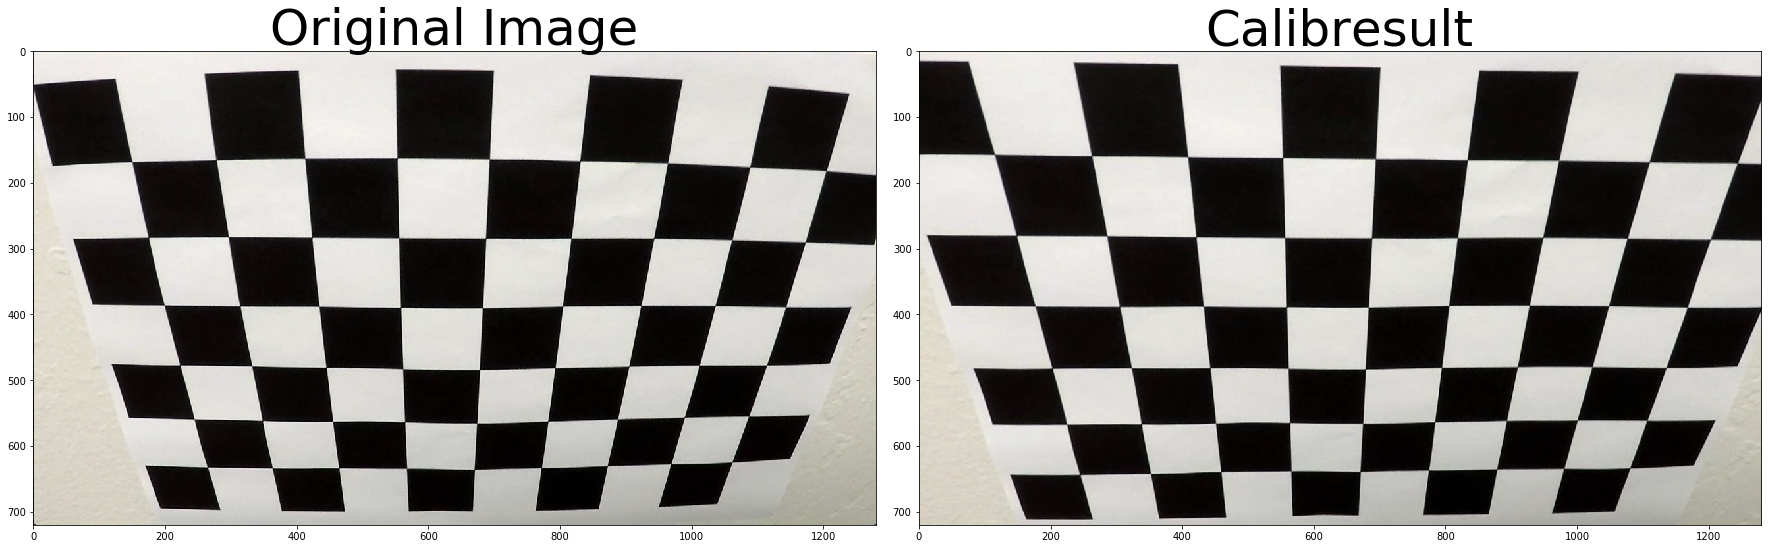

In [5]:
#Desmonstation 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Calibresult', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [6]:
road_image = 'test_images/test6.jpg'
test_x = 'test_images/test5.jpg'
img_img = mpimg.imread(road_image)
test_img = mpimg.imread(test_x)
gray = cv2.cvtColor(img_img, cv2.COLOR_RGB2GRAY)
gray_x = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
height, width = gray.shape
height_x, width_x = gray_x.shape

test_img1 = 'test_images/test5.jpg'
test_img2 = 'test_images/test6.jpg'
test_img3 = 'test_images/straight_lines1.jpg'
test_img4 = 'test_images/straight_lines2.jpg'
test_img5 = 'test_images/test1.jpg'
test_img6 = 'test_images/test2.jpg'
test_img7 = 'test_images/test3.jpg'
test_img8 = 'test_images/test4.jpg'
test_img1 = mpimg.imread(test_img1)
test_img2 = mpimg.imread(test_img2)
test_img3 = mpimg.imread(test_img3)
test_img4 = mpimg.imread(test_img4)
test_img5 = mpimg.imread(test_img5)
test_img6 = mpimg.imread(test_img6)
test_img7 = mpimg.imread(test_img7)
test_img8 = mpimg.imread(test_img8)

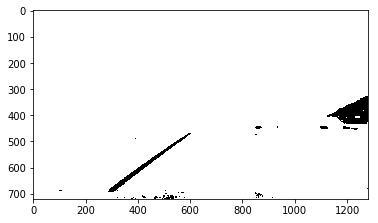

In [7]:
def lab(img):
    
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    B   = lab[:,:,2]
    thresh = (110, 165)
    binary = np.zeros_like(B)
    binary[(B > thresh[0]) & (B <= thresh[1])] = 1
    
    return binary

binary = lab(img_img)
plt.imshow(binary, cmap='gray')
plt.show()

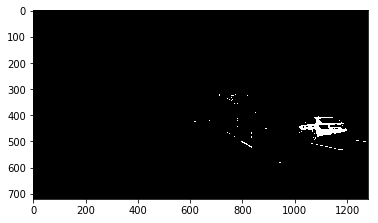

In [8]:
def luv(img):
    
    luv = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
    L   = luv[:,:,0]
    
    thresh = (215, 255)
    binary = np.zeros_like(L)
    binary[(L >= thresh[0]) & (L <= thresh[1])] = 1
    
    return binary

binary = luv(img_img)
plt.imshow(binary, cmap='gray')
plt.show()  

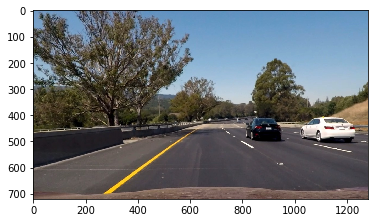

In [9]:
a = cv2.undistort(img_img, mtx, dist, None, mtx)
plt.imshow(a)
plt.show()

In [10]:
##### Create magnitude and direction threshold

In [11]:
def abs_sobel_thresh(gray, orient='x', thresh=(0, 255)):
      
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    
    #scale back to 8 bit
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    #create a copy and apply the threshold
    ab_binary = np.zeros_like(scaled_sobel)
    ab_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    
    return ab_binary

In [12]:
# agnitude threshold of image
def mag_thresh(gray, sobel_kernel=3, thresh=(0, 255)):
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobelxy = np.sqrt(sobelx*sobelx+sobely*sobely)
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    mag_binarxy = np.zeros_like(scaled_sobel)
    mag_binarxy[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
        
    return mag_binarxy

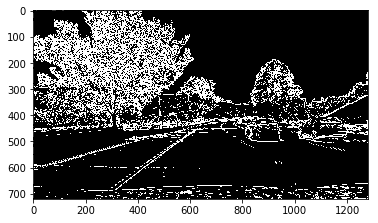

In [13]:
mag_binary = mag_thresh(gray, sobel_kernel=3, thresh=(20, 100))
# Plot the result
plt.imshow(mag_binary, cmap='gray')
plt.show()

In [14]:
def dir_threshold(gray, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    direction = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_out = np.zeros_like(direction)
    binary_out[(direction >= thresh[0]) & (direction <= thresh[1])] = 1
    
    return binary_out

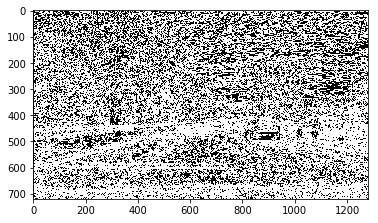

In [15]:
dir_binary = dir_threshold(gray, sobel_kernel=3, thresh=(np.pi/6, np.pi/2))
# Plot the result
plt.imshow(dir_binary, cmap='gray')
plt.show()

In [16]:
def threshold_images(img):
    
    img1 = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    height, width = gray.shape
    
    # apply x gradient threshold
    gradx = abs_sobel_thresh(gray, 'x', thresh=(10, 200))

    # apply gradient direction threshold
    ksize = 3
    dir_binary = dir_threshold(gray, sobel_kernel=ksize, thresh=(np.pi/6, np.pi/2))
    
    x_dir_threshold = ((gradx == 1) & (dir_binary == 1))
    
    # Threshold color channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    
    s_channel = hls[:,:,2]
    s_thresh = (100, 255)
    s_threshold = (s_channel> s_thresh[0]) & (s_channel<= s_thresh[1])
    
    l_channel = hls[:,:,1]
    l_thresh = (120, 255)
    l_threshold = (l_channel > l_thresh[0]) & (l_channel <= l_thresh[1])
       
    rgb_thresh = 150
    r_channel = img[:,:,0]
    g_channel = img[:,:,1]
    combined_all = np.zeros_like(r_channel)
    r_g_threshold = (r_channel > rgb_thresh) & (g_channel > rgb_thresh)
    
    combined_all[(r_g_threshold & l_threshold) & (s_threshold | x_dir_threshold)] = 1
    
    #mask
    mask = np.zeros_like(combined_all)
    vertices = np.array([[0,height-1], [width/2, int(0.5*height)], [width-1, height-1]], dtype=np.int32)
    cv2.fillPoly(mask, [vertices], 1)
    result = cv2.bitwise_and(combined_all, mask)
    
    return result

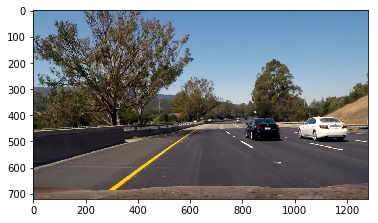

In [17]:
plt.imshow(img_img)
plt.show()

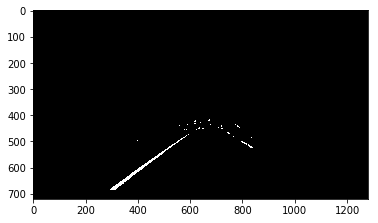

In [18]:
color_binary = threshold_images(img_img)
plt.imshow(color_binary, cmap='gray')
plt.show()

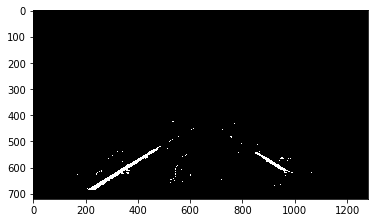

In [19]:
test_img1 = threshold_images(test_img1)
plt.imshow(test_img1, cmap='gray')
plt.show()

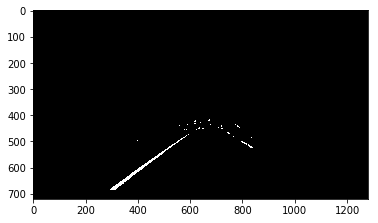

In [20]:
test_img2 = threshold_images(test_img2)
plt.imshow(test_img2, cmap='gray')
plt.show()

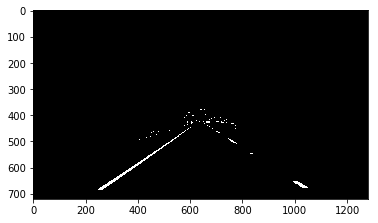

In [21]:
test_img3 = threshold_images(test_img3)
plt.imshow(test_img3, cmap='gray')
plt.show()

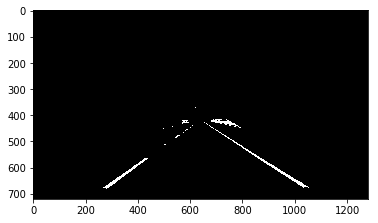

In [22]:
test_img4 = threshold_images(test_img4)
plt.imshow(test_img4, cmap='gray')
plt.show()

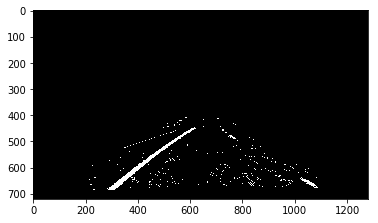

In [23]:
test_img5 = threshold_images(test_img5)
plt.imshow(test_img5, cmap='gray')
plt.show()

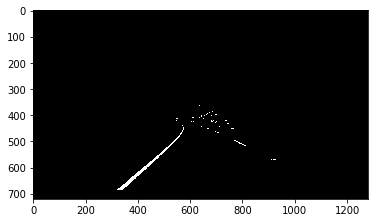

In [24]:
test_img6 = threshold_images(test_img6)
plt.imshow(test_img6, cmap='gray')
plt.show()

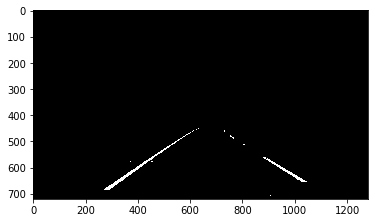

In [25]:
test_img7 = threshold_images(test_img7)
plt.imshow(test_img7, cmap='gray')
plt.show()

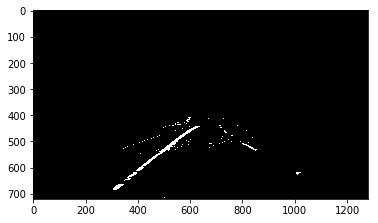

In [26]:
test_img8 = threshold_images(test_img8)
plt.imshow(test_img8, cmap='gray')
plt.show()


1. Check both the polynomials are correctly distanced with respect to the width of a lane.
2. Check the curvature of both polynomials whether it is similiar or not.
3. Also check the binary thresholding for improvement because mostly the detection is failing in shadows and brighter lane.
4. Also if there is an issue in a single frame then you can reject that wrong detection and reuse the confident detection from the previous detection. For smoothening the lane lines and for reducing wrong detection you can try averaging lane detection using a series of multiple frames.
5. In addition to other filtering mechanisms. You can also use cv2.matchShapes as a means to make sure the final warp polygon is of good quality. This can be done by comparing two shapes returning 0 index for identical shapes. You can use this to make sure that the polygon of your next frame is closer to what is expected and if not then can use the old polygon instead. This way you are faking it until a new frames appear and hence will get good results.


In [27]:
#### Code below comes from my previous work, i do not understand well about how to choose src and dst points
def perspective(img):
    #Source points
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
    
    dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

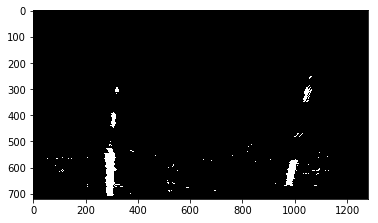

In [28]:
binary_warped = perspective(color_binary)

test_img11 = perspective(test_img1)
test_img22 = perspective(test_img2)
test_img33 = perspective(test_img3)
test_img44 = perspective(test_img4)
test_img55 = perspective(test_img5)
test_img66 = perspective(test_img6)
test_img77 = perspective(test_img7)
test_img88 = perspective(test_img8)

plt.imshow(test_img11, cmap='gray')
plt.show()

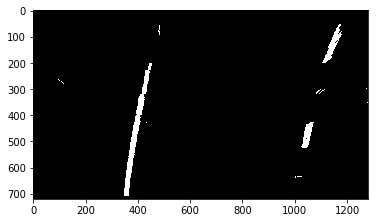

In [29]:
plt.imshow(binary_warped, cmap='gray')
plt.show()

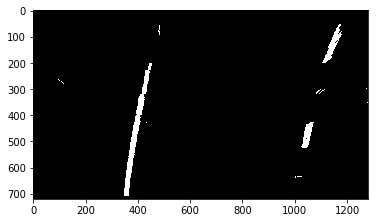

In [30]:
plt.imshow(test_img22, cmap='gray')
plt.show()

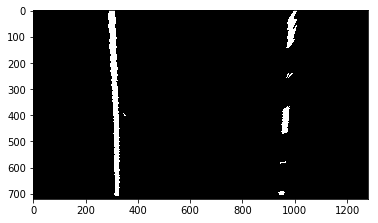

In [31]:
plt.imshow(test_img33, cmap='gray')
plt.show()

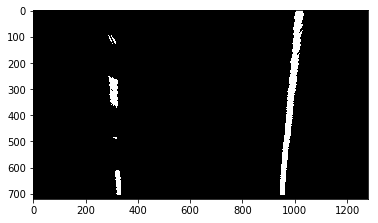

In [32]:
plt.imshow(test_img44, cmap='gray')
plt.show()

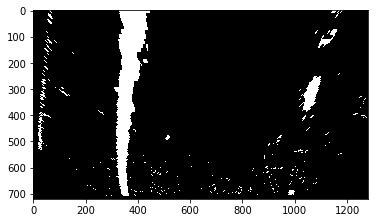

In [33]:
plt.imshow(test_img55, cmap='gray')
plt.show()

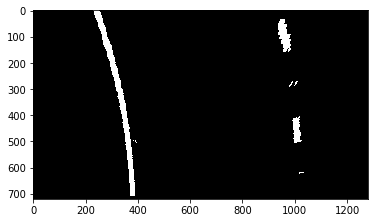

In [34]:
plt.imshow(test_img66, cmap='gray')
plt.show()

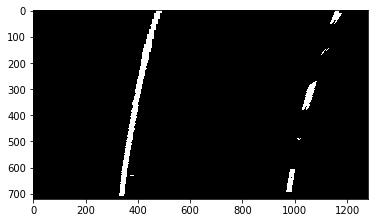

In [35]:
plt.imshow(test_img77, cmap='gray')
plt.show()

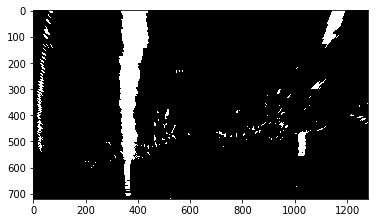

In [36]:
plt.imshow(test_img88, cmap='gray')
plt.show()

In [37]:
# do inverse persepective ops 

def inverse_perspective(img):
    #Source points
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
    
    dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])
    
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    return Minv  

In [38]:
def hist(img):

    bottom_half = img[img.shape[0]//2:, :]
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram

In [39]:
print(img.shape[0])

720


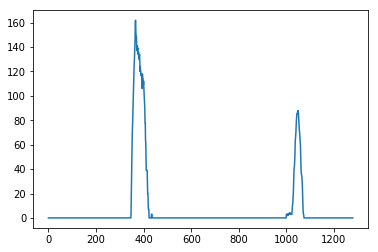

In [40]:
histogram = hist(binary_warped)
plt.plot(histogram)

In [41]:
midpoint = np.int(histogram.shape[0]//2)
left_line = np.argmax(histogram[:midpoint])
right_line = np.argmax(histogram[midpoint:]) + midpoint
print(right_line)
print(left_line)

1049
366


In [42]:
nwindows = 9
windows_height = np.int(binary_warped.shape[0]//nwindows)
none_zero = binary_warped.nonzero()
none_zerox = np.array(none_zero[1])
none_zeroy = np.array(none_zero[0])


current_leftx = left_line
current_rightx = right_line

leftx_index = []
rightx_index = []

print(none_zero)
print(len(none_zerox))
print(len(none_zeroy))

(array([ 54,  54,  54, ..., 707, 707, 707]), array([1172, 1173, 1174, ...,  365,  366,  367]))
16446
16446


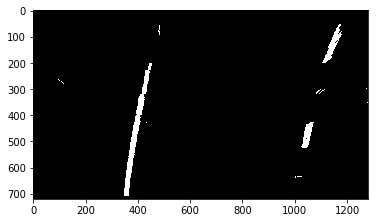

In [43]:
img_x = np.dstack((binary_warped, binary_warped, binary_warped)) * 255
plt.imshow(img_x)
plt.show()

In [162]:
#Aid for correction mech
class Line:
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [] 
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #number of detected pixels
        self.px_count = None
    
    def use_good_fit(self, fit, idx):
        
        if not fit is None:
            
            if not self.best_fit is None:
                self.diffs = abs(fit - self.best_fit)
            # making sure difference in fit coefficients between last and new fits greater than threshold 
            if (self.diffs[0] > 0.001 or \
               self.diffs[1] > 1.0 or \
               self.diffs[2] > 100.) and \
               len(self.current_fit) > 0:
                # bad fit! abort! abort! ... well, unless there are no fits in the current_fit queue, then we'll take it
                self.detected = False      
            else:
                #if detected, add to current_fit
                self.detected = True
                self.px_count = np.count_nonzero(idx)
                self.current_fit.append(fit)
                #get rid of top 10 oldest fit
                if len(self.current_fit) > 5:
                    self.current_fit = self.current_fit[len(self.current_fit)-10:]
                self.best_fit = np.average(self.current_fit, axis=0)
        else:
            self.detected = False
            if len(self.current_fit) > 0:
                self.current_fit = self.current_fit[:len(self.current_fit)-1]
            else:
                self.best_fit = np.average(self.current_fit, axis=0)   

In [163]:
# Create letf and right lanes for tracking

left_lane = Line()
right_lane = Line()

In [104]:
# a function will help me track how line goes
def slide_windows_show(binary_warped, nwindows, margin, minpix):
    
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Set height of windows
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):

        #set bountry for left rectangle
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height

        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin

        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2)

        #for right one
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin

        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2)

        #take care of left index
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        left_lane_inds.append(good_left_inds)
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))

        #for right index
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        right_lane_inds.append(good_right_inds)
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))


    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img
        

In [105]:
# a function will help me track how line goes
def slide_windows_fit(binary_warped, nwindows, margin, minpix):
    
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Set height of windows
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):

        #set bountry for left rectangle
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height

        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin

        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2)

        #for right one
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin

        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2)

        #take care of left index
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        left_lane_inds.append(good_left_inds)
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))

        #for right index
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        right_lane_inds.append(good_right_inds)
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))


    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds
        

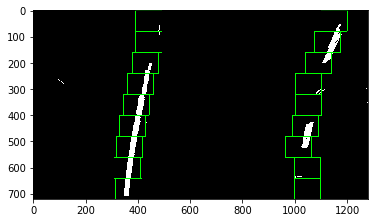

In [106]:
# visualization for debugging purpose
leftx, lefty, rightx, righty, output_img = slide_windows_show(binary_warped, 9, 50, 50)
plt.imshow(output_img)
plt.show()

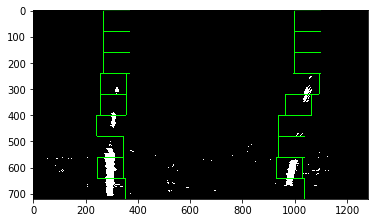

In [107]:
leftx, lefty, rightx, righty, output_img1 = slide_windows_show(test_img11, 9, 50, 50)
plt.imshow(output_img1)
plt.show()

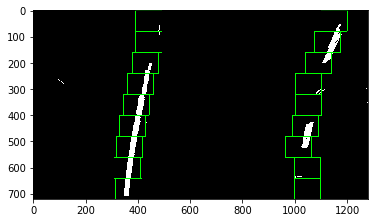

In [108]:
leftx, lefty, rightx, righty, output_img2 = slide_windows_show(test_img22, 9, 50, 50)
plt.imshow(output_img2)
plt.show()

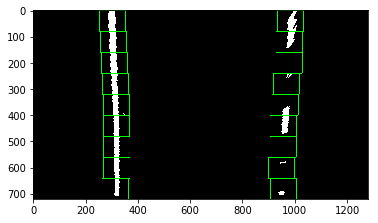

In [109]:
leftx, lefty, rightx, righty, output_img3 = slide_windows_show(test_img33, 9, 50, 50)
plt.imshow(output_img3)
plt.show()

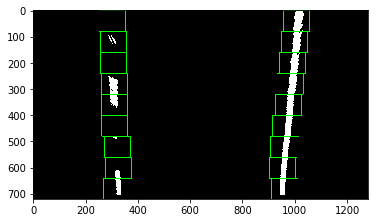

In [110]:
leftx, lefty, rightx, righty, output_img4 = slide_windows_show(test_img44, 9, 50, 50)
plt.imshow(output_img4)
plt.show()

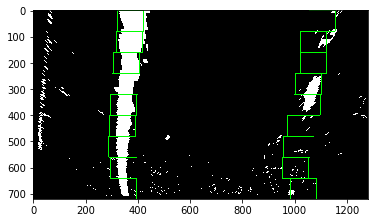

In [111]:
leftx, lefty, rightx, righty, output_img5 = slide_windows_show(test_img55, 9, 50, 50)
plt.imshow(output_img5)
plt.show()

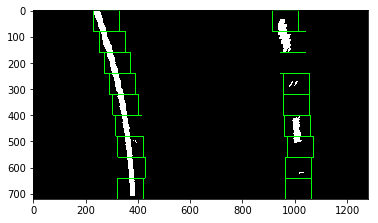

In [112]:
leftx, lefty, rightx, righty, output_img6 = slide_windows_show(test_img66, 9, 50, 50)
plt.imshow(output_img6)
plt.show()

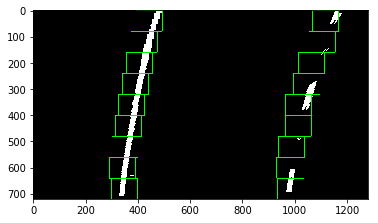

In [113]:
leftx, lefty, rightx, righty, output_img7 = slide_windows_show(test_img77, 9, 50, 50)
plt.imshow(output_img7)
plt.show()

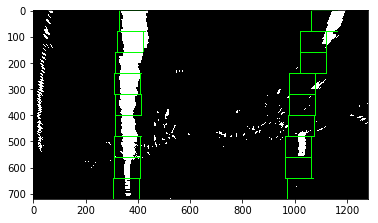

In [114]:
leftx, lefty, rightx, righty, output_img8 = slide_windows_show(test_img88, 9, 50, 50)
plt.imshow(output_img8)
plt.show()

In [115]:
def fit_poly_show(binary_warped, nwindows, margain, minpix):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = slide_windows_show(binary_warped, nwindows, margain, minpix)
    
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
#     plt.plot(left_fitx, ploty, color='yellow')
#     plt.plot(right_fitx, ploty, color='yellow')

    return left_fitx, right_fitx, left_fit, right_fit, ploty, out_img

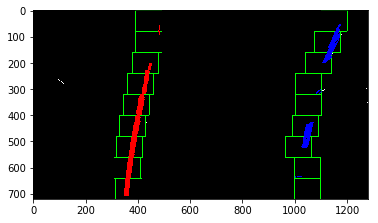

In [116]:
left_fitx, right_fitx, left_fit, right_fit, ploty, out_img = fit_poly_show(binary_warped, 9, 50, 50)
plt.imshow(out_img)
plt.show()

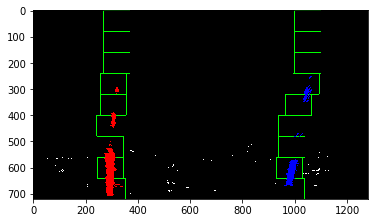

In [117]:
left_fitx, right_fitx, left_fit, right_fit, ploty, out_img1 = fit_poly_show(test_img11, 9, 50, 50)
plt.imshow(out_img1)
plt.show()

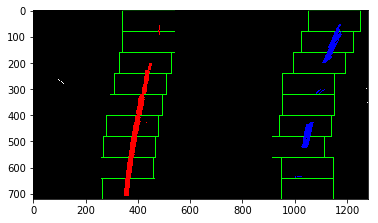

In [118]:
left_fitx, right_fitx, left_fit, right_fit, ploty, out_img2 = fit_poly_show(test_img22, 9, 100, 50)
plt.imshow(out_img2)
plt.show()

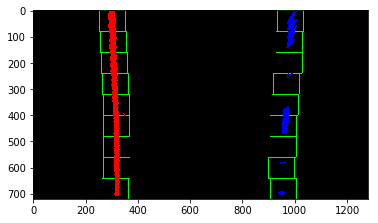

In [119]:
left_fitx, right_fitx, left_fit, right_fit, ploty, out_img3 = fit_poly_show(test_img33, 9, 50, 50)
plt.imshow(out_img3)
plt.show()

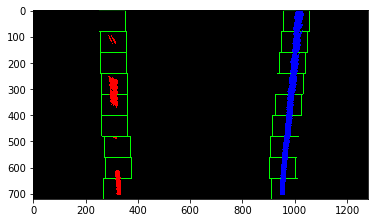

In [120]:
left_fitx, right_fitx, left_fit, right_fit, ploty, out_img4 = fit_poly_show(test_img44, 9, 50, 50)
plt.imshow(out_img4)
plt.show()

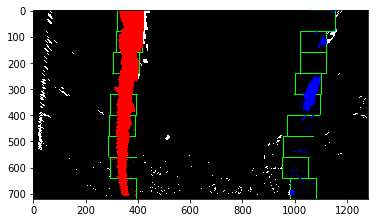

In [121]:
left_fitx, right_fitx, left_fit, right_fit, ploty, out_img5 = fit_poly_show(test_img55, 9, 50, 50)
plt.imshow(out_img5)
plt.show()

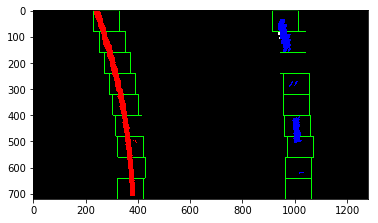

In [122]:
left_fitx, right_fitx, left_fit, right_fit, ploty, out_img6 = fit_poly_show(test_img66, 9, 50, 50)
plt.imshow(out_img6)
plt.show()

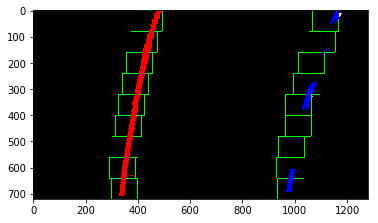

In [123]:
left_fitx, right_fitx, left_fit, right_fit, ploty, out_img7 = fit_poly_show(test_img77, 9, 50, 50)
plt.imshow(out_img7)
plt.show()

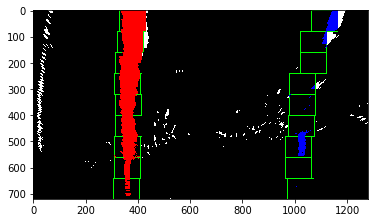

In [124]:
left_fitx, right_fitx, left_fit, right_fit, ploty, out_img8 = fit_poly_show(test_img88, 9, 50, 50)
plt.imshow(out_img8)
plt.show()

In [125]:
def draw_on_image(binary_warped, left_fitx, right_fitx, margin, ploty, window_img):

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    return result

In [126]:
def fit_polynomial(binary_warped, nwindows, margain, minpix):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = slide_windows_show(binary_warped, nwindows, margain, minpix)
    
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    result = draw_on_image(binary_warped, left_fitx, right_fitx, margin, ploty, window_img)
    
#     plt.plot(left_fitx, ploty, color='yellow')
#     plt.plot(right_fitx, ploty, color='yellow')
#     plt.xlim(0, 1280)
#     plt.ylim(720, 0)
    
    return result

In [127]:
# function to calculate offset
# how far is the center of the lane from the center of the image
def center_offset(binary_warped, left_fit, right_fit):
    
    xm_per_pix = 3.7/700
    
    # image midpoint
    img_mid = binary_warped.shape[1] // 2
    
    # image height
    h = binary_warped.shape[0]
    
    if left_fit is not None and right_fit is not None:
        l = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
        r = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]
        
        center = (l + r) / 2
        offset = (img_mid - center) * xm_per_pix
        
    return offset

In [128]:
offset = center_offset(binary_warped, left_fit, right_fit)
print(offset)

-0.26660204751877686


In [129]:
def fit_poly(binary_warped, leftx, lefty, rightx, righty):
    
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(rightx, righty, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty

In [130]:
def customized_search_show(binary_warped, left_fit, right_fit):

    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    result = draw_on_image(binary_warped, left_fitx, right_fitx, margin, ploty, window_img)
    
#     plt.plot(left_fitx, ploty, color='yellow')
#     plt.plot(right_fitx, ploty, color='yellow')
#     plt.xlim(0, 1280)
#     plt.ylim(720, 0)
    
    return result

In [131]:
def customized_search(binary_warped, left_fit, right_fit):

    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds

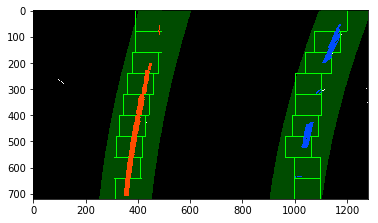

In [132]:
result = customized_search_show(binary_warped, left_fit, right_fit)
plt.imshow(result)
plt.show()

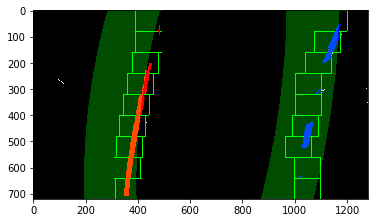

In [133]:
result_1 = customized_search_show(test_img11, left_fit, right_fit)
plt.imshow(result_1)
plt.show()

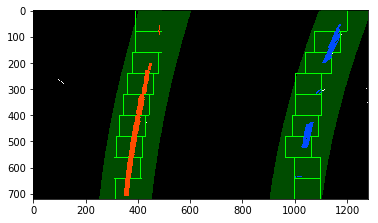

In [134]:
result_2 = customized_search_show(test_img22, left_fit, right_fit)
plt.imshow(result_2)
plt.show()

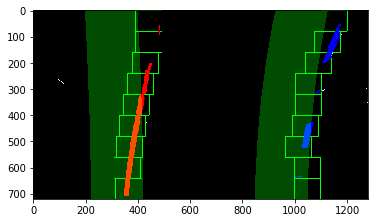

In [135]:
result_3 = customized_search_show(test_img33, left_fit, right_fit)
plt.imshow(result_3)
plt.show()

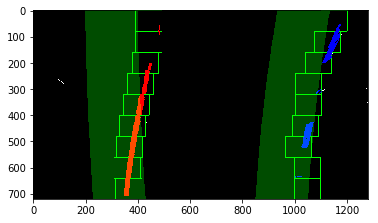

In [136]:
result_4 = customized_search_show(test_img44, left_fit, right_fit)
plt.imshow(result_4)
plt.show()

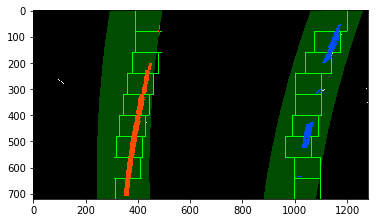

In [137]:
result_5 = customized_search_show(test_img55, left_fit, right_fit)
plt.imshow(result_5)
plt.show()

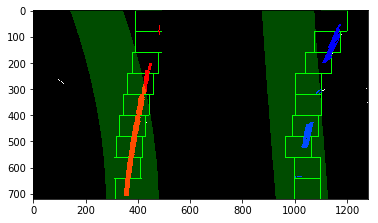

In [138]:
result_6 = customized_search_show(test_img66, left_fit, right_fit)
plt.imshow(result_6)
plt.show()

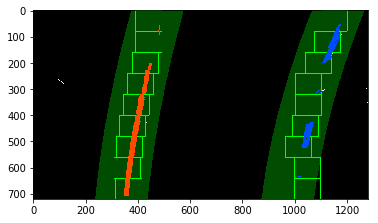

In [139]:
result_7 = customized_search_show(test_img77, left_fit, right_fit)
plt.imshow(result_7)
plt.show()

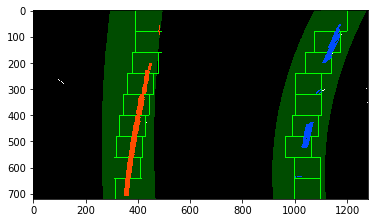

In [140]:
result_8 = customized_search_show(test_img88, left_fit, right_fit)
plt.imshow(result_8)
plt.show()

In [141]:
def measure_curvature_real(left_fit, right_fit, ploty):
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    # Calculation of R_curve (radius of curvature)
    left_curverad = ((1 + (2*left_fit[0]*y_eval*ym_per_pix + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval*ym_per_pix + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    
    return left_curverad, right_curverad

In [142]:
left_curverad_real, right_curverad_real = measure_curvature_real(left_fit, right_fit, ploty)
print(left_curverad_real)
print(right_curverad_real)

4892.078058930819
2209.5062262860456


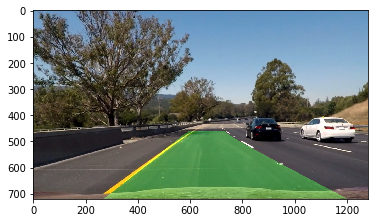

In [143]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

Minv = inverse_perspective(binary_warped)
undist = cv2.undistort(img_img, mtx, dist, None, mtx)
# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (binary_warped.shape[1], binary_warped.shape[0]), flags=cv2.INTER_LINEAR) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.imshow(result)

In [144]:
def combine(binary_warped, raw_image, left_fit, right_fit):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty 
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    Minv = inverse_perspective(binary_warped)
    
    undist = cv2.undistort(raw_image, mtx, dist, None, mtx)
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (binary_warped.shape[1], binary_warped.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    
    return result

In [164]:
## couple questions 
## how do we take care of first input(image)? it's inside of pipeline or outside? if inside, it's quite ineffectient 
## problem i got here is more like chicken first or eggs first
## My solution is to check left_fit and right_fit. if any of them detected, it means we can use customized search
## that being said, i need initilization points for customized search, otherwise i couldnt use it
def pipeline(images):
    
    threshold_image = threshold_images(images)
    binary_warped = perspective(threshold_image)
    
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    
    nwindows = 9
    margin  = 50
    minpix   = 50
    
    if not right_lane.detected or not left_lane.detected:
        left_fit, right_fit, left_lane_inds, right_lane_inds = slide_windows_fit(binary_warped, nwindows, margin, minpix)   
    else:
        left_fit, right_fit, left_lane_inds, right_lane_inds = customized_search(binary_warped, left_lane.best_fit, right_lane.best_fit)
    
    # By using this below, we can get the best fit   
    left_lane.use_good_fit(left_fit, left_lane_inds)
    right_lane.use_good_fit(right_fit, right_lane_inds)
    
    # if best fit found, draw on images
    if not left_lane.best_fit is None and not right_lane.best_fit is None:
        result = combine(binary_warped, images, left_lane.best_fit, right_lane.best_fit)
        offset = center_offset(binary_warped, left_lane.best_fit, right_lane.best_fit)
        
        left_curverad_real, right_curverad_real = measure_curvature_real(left_lane.best_fit, right_lane.best_fit, ploty)
         
        cv2.putText(result,str(left_curverad_real), (100, 90), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
        cv2.putText(result,str(right_curverad_real), (100, 155), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
        cv2.putText(result,str(offset), (100, 205), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
    
    return result

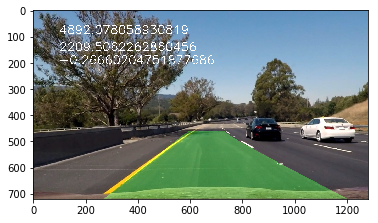

In [165]:
k = pipeline(img_img)
plt.imshow(k)
plt.show()

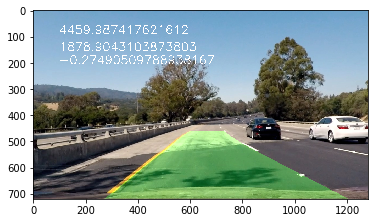

In [166]:
i44 = 'test_images/test4.jpg'
i44 = mpimg.imread(i44)
k = pipeline(i44)
plt.imshow(k)
plt.show()

In [167]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [168]:
write_output = 'project_video_out2.mp4'
clip1 = VideoFileClip("project_video.mp4")
write_clip = clip1.fl_image(pipeline) #NOTE: this function expects color images!!
%time write_clip.write_videofile(write_output, audio=False)

[MoviePy] >>>> Building video project_video_out2.mp4
[MoviePy] Writing video project_video_out2.mp4




  0%|          | 0/1261 [00:00<?, ?it/s]

  0%|          | 1/1261 [00:04<1:37:28,  4.64s/it]

  0%|          | 2/1261 [00:07<1:20:24,  3.83s/it]

  0%|          | 3/1261 [00:09<1:08:04,  3.25s/it]

  0%|          | 4/1261 [00:11<57:49,  2.76s/it]  

  0%|          | 5/1261 [00:12<52:57,  2.53s/it]

  0%|          | 6/1261 [00:13<48:01,  2.30s/it]

  1%|          | 7/1261 [00:16<50:24,  2.41s/it]

  1%|          | 8/1261 [00:17<44:41,  2.14s/it]

  1%|          | 9/1261 [00:17<41:35,  1.99s/it]

  1%|          | 10/1261 [00:19<40:57,  1.96s/it]

  1%|          | 11/1261 [00:22<43:30,  2.09s/it]

  1%|          | 12/1261 [00:23<40:13,  1.93s/it]

  1%|          | 13/1261 [00:28<45:13,  2.17s/it]

  1%|          | 14/1261 [00:32<48:47,  2.35s/it]

  1%|          | 15/1261 [00:34<47:37,  2.29s/it]

  1%|▏         | 16/1261 [00:39<51:07,  2.46s/it]

  1%|▏         | 17/1261 [00:42<52:13,  2.52s/it]

  1%|▏         | 18/1261 [00:43<50:34,  2.44s/it]

  2%|▏         | 19/1261 [00:50<54:43, 

 11%|█▏        | 143/1261 [05:37<43:55,  2.36s/it]

 11%|█▏        | 144/1261 [05:37<43:37,  2.34s/it]

 11%|█▏        | 145/1261 [05:37<43:19,  2.33s/it]

 12%|█▏        | 146/1261 [05:37<43:00,  2.31s/it]

 12%|█▏        | 147/1261 [05:38<42:42,  2.30s/it]

 12%|█▏        | 148/1261 [05:38<42:24,  2.29s/it]

 12%|█▏        | 149/1261 [05:38<42:06,  2.27s/it]

 12%|█▏        | 150/1261 [05:38<41:48,  2.26s/it]

 12%|█▏        | 151/1261 [05:38<41:31,  2.24s/it]

 12%|█▏        | 152/1261 [05:39<41:14,  2.23s/it]

 12%|█▏        | 153/1261 [05:39<40:56,  2.22s/it]

 12%|█▏        | 154/1261 [05:39<40:39,  2.20s/it]

 12%|█▏        | 155/1261 [05:39<40:22,  2.19s/it]

 12%|█▏        | 156/1261 [05:39<40:06,  2.18s/it]

 12%|█▏        | 157/1261 [05:39<39:50,  2.17s/it]

 13%|█▎        | 158/1261 [05:40<39:34,  2.15s/it]

 13%|█▎        | 159/1261 [05:40<39:18,  2.14s/it]

 13%|█▎        | 160/1261 [05:40<39:02,  2.13s/it]

 13%|█▎        | 161/1261 [05:40<38:47,  2.12s/it]

 13%|█▎     

 23%|██▎       | 284/1261 [06:01<20:42,  1.27s/it]

 23%|██▎       | 285/1261 [06:01<20:37,  1.27s/it]

 23%|██▎       | 286/1261 [06:01<20:31,  1.26s/it]

 23%|██▎       | 287/1261 [06:01<20:26,  1.26s/it]

 23%|██▎       | 288/1261 [06:01<20:21,  1.26s/it]

 23%|██▎       | 289/1261 [06:01<20:16,  1.25s/it]

 23%|██▎       | 290/1261 [06:01<20:11,  1.25s/it]

 23%|██▎       | 291/1261 [06:02<20:06,  1.24s/it]

 23%|██▎       | 292/1261 [06:02<20:02,  1.24s/it]

 23%|██▎       | 293/1261 [06:02<19:57,  1.24s/it]

 23%|██▎       | 294/1261 [06:02<19:53,  1.23s/it]

 23%|██▎       | 295/1261 [06:02<19:48,  1.23s/it]

 23%|██▎       | 296/1261 [06:03<19:43,  1.23s/it]

 24%|██▎       | 297/1261 [06:03<19:38,  1.22s/it]

 24%|██▎       | 298/1261 [06:03<19:34,  1.22s/it]

 24%|██▎       | 299/1261 [06:03<19:29,  1.22s/it]

 24%|██▍       | 300/1261 [06:03<19:25,  1.21s/it]

 24%|██▍       | 301/1261 [06:03<19:20,  1.21s/it]

 24%|██▍       | 302/1261 [06:04<19:16,  1.21s/it]

 24%|██▍    

 34%|███▎      | 425/1261 [06:24<12:35,  1.11it/s]

 34%|███▍      | 426/1261 [06:24<12:33,  1.11it/s]

 34%|███▍      | 427/1261 [06:24<12:30,  1.11it/s]

 34%|███▍      | 428/1261 [06:24<12:28,  1.11it/s]

 34%|███▍      | 429/1261 [06:24<12:26,  1.12it/s]

 34%|███▍      | 430/1261 [06:24<12:23,  1.12it/s]

 34%|███▍      | 431/1261 [06:25<12:21,  1.12it/s]

 34%|███▍      | 432/1261 [06:25<12:19,  1.12it/s]

 34%|███▍      | 433/1261 [06:25<12:17,  1.12it/s]

 34%|███▍      | 434/1261 [06:25<12:14,  1.13it/s]

 34%|███▍      | 435/1261 [06:25<12:12,  1.13it/s]

 35%|███▍      | 436/1261 [06:25<12:10,  1.13it/s]

 35%|███▍      | 437/1261 [06:26<12:07,  1.13it/s]

 35%|███▍      | 438/1261 [06:26<12:05,  1.13it/s]

 35%|███▍      | 439/1261 [06:26<12:03,  1.14it/s]

 35%|███▍      | 440/1261 [06:26<12:01,  1.14it/s]

 35%|███▍      | 441/1261 [06:26<11:59,  1.14it/s]

 35%|███▌      | 442/1261 [06:26<11:56,  1.14it/s]

 35%|███▌      | 443/1261 [06:27<11:54,  1.14it/s]

 35%|███▌   

 45%|████▍     | 566/1261 [06:48<08:21,  1.39it/s]

 45%|████▍     | 567/1261 [06:48<08:20,  1.39it/s]

 45%|████▌     | 568/1261 [06:48<08:18,  1.39it/s]

 45%|████▌     | 569/1261 [06:48<08:17,  1.39it/s]

 45%|████▌     | 570/1261 [06:49<08:15,  1.39it/s]

 45%|████▌     | 571/1261 [06:49<08:14,  1.40it/s]

 45%|████▌     | 572/1261 [06:49<08:13,  1.40it/s]

 45%|████▌     | 573/1261 [06:49<08:11,  1.40it/s]

 46%|████▌     | 574/1261 [06:49<08:10,  1.40it/s]

 46%|████▌     | 575/1261 [06:50<08:09,  1.40it/s]

 46%|████▌     | 576/1261 [06:50<08:07,  1.40it/s]

 46%|████▌     | 577/1261 [06:50<08:06,  1.41it/s]

 46%|████▌     | 578/1261 [06:50<08:05,  1.41it/s]

 46%|████▌     | 579/1261 [06:50<08:03,  1.41it/s]

 46%|████▌     | 580/1261 [06:50<08:02,  1.41it/s]

 46%|████▌     | 581/1261 [06:51<08:01,  1.41it/s]

 46%|████▌     | 582/1261 [06:51<07:59,  1.42it/s]

 46%|████▌     | 583/1261 [06:51<07:58,  1.42it/s]

 46%|████▋     | 584/1261 [06:51<07:57,  1.42it/s]

 46%|████▋  

 56%|█████▌    | 707/1261 [07:13<05:39,  1.63it/s]

 56%|█████▌    | 708/1261 [07:13<05:38,  1.63it/s]

 56%|█████▌    | 709/1261 [07:13<05:37,  1.63it/s]

 56%|█████▋    | 710/1261 [07:13<05:36,  1.64it/s]

 56%|█████▋    | 711/1261 [07:13<05:35,  1.64it/s]

 56%|█████▋    | 712/1261 [07:14<05:34,  1.64it/s]

 57%|█████▋    | 713/1261 [07:14<05:33,  1.64it/s]

 57%|█████▋    | 714/1261 [07:14<05:32,  1.64it/s]

 57%|█████▋    | 715/1261 [07:14<05:31,  1.65it/s]

 57%|█████▋    | 716/1261 [07:14<05:30,  1.65it/s]

 57%|█████▋    | 717/1261 [07:15<05:30,  1.65it/s]

 57%|█████▋    | 718/1261 [07:15<05:29,  1.65it/s]

 57%|█████▋    | 719/1261 [07:15<05:28,  1.65it/s]

 57%|█████▋    | 720/1261 [07:15<05:27,  1.65it/s]

 57%|█████▋    | 721/1261 [07:15<05:26,  1.65it/s]

 57%|█████▋    | 722/1261 [07:15<05:25,  1.66it/s]

 57%|█████▋    | 723/1261 [07:16<05:24,  1.66it/s]

 57%|█████▋    | 724/1261 [07:16<05:23,  1.66it/s]

 57%|█████▋    | 725/1261 [07:16<05:22,  1.66it/s]

 58%|█████▊ 

 67%|██████▋   | 848/1261 [07:37<03:42,  1.86it/s]

 67%|██████▋   | 849/1261 [07:37<03:41,  1.86it/s]

 67%|██████▋   | 850/1261 [07:37<03:41,  1.86it/s]

 67%|██████▋   | 851/1261 [07:37<03:40,  1.86it/s]

 68%|██████▊   | 852/1261 [07:37<03:39,  1.86it/s]

 68%|██████▊   | 853/1261 [07:37<03:39,  1.86it/s]

 68%|██████▊   | 854/1261 [07:38<03:38,  1.86it/s]

 68%|██████▊   | 855/1261 [07:38<03:37,  1.87it/s]

 68%|██████▊   | 856/1261 [07:38<03:36,  1.87it/s]

 68%|██████▊   | 857/1261 [07:38<03:36,  1.87it/s]

 68%|██████▊   | 858/1261 [07:38<03:35,  1.87it/s]

 68%|██████▊   | 859/1261 [07:38<03:34,  1.87it/s]

 68%|██████▊   | 860/1261 [07:39<03:34,  1.87it/s]

 68%|██████▊   | 861/1261 [07:39<03:33,  1.88it/s]

 68%|██████▊   | 862/1261 [07:39<03:32,  1.88it/s]

 68%|██████▊   | 863/1261 [07:39<03:31,  1.88it/s]

 69%|██████▊   | 864/1261 [07:39<03:31,  1.88it/s]

 69%|██████▊   | 865/1261 [07:39<03:30,  1.88it/s]

 69%|██████▊   | 866/1261 [07:40<03:29,  1.88it/s]

 69%|██████▉

 78%|███████▊  | 989/1261 [08:00<02:12,  2.06it/s]

 79%|███████▊  | 990/1261 [08:00<02:11,  2.06it/s]

 79%|███████▊  | 991/1261 [08:00<02:11,  2.06it/s]

 79%|███████▊  | 992/1261 [08:01<02:10,  2.06it/s]

 79%|███████▊  | 993/1261 [08:01<02:09,  2.06it/s]

 79%|███████▉  | 994/1261 [08:01<02:09,  2.06it/s]

 79%|███████▉  | 995/1261 [08:01<02:08,  2.07it/s]

 79%|███████▉  | 996/1261 [08:01<02:08,  2.07it/s]

 79%|███████▉  | 997/1261 [08:02<02:07,  2.07it/s]

 79%|███████▉  | 998/1261 [08:02<02:07,  2.07it/s]

 79%|███████▉  | 999/1261 [08:02<02:06,  2.07it/s]

 79%|███████▉  | 1000/1261 [08:02<02:06,  2.07it/s]

 79%|███████▉  | 1001/1261 [08:02<02:05,  2.07it/s]

 79%|███████▉  | 1002/1261 [08:03<02:04,  2.07it/s]

 80%|███████▉  | 1003/1261 [08:03<02:04,  2.08it/s]

 80%|███████▉  | 1004/1261 [08:03<02:03,  2.08it/s]

 80%|███████▉  | 1005/1261 [08:03<02:03,  2.08it/s]

 80%|███████▉  | 1006/1261 [08:03<02:02,  2.08it/s]

 80%|███████▉  | 1007/1261 [08:04<02:02,  2.08it/s]

 80%

 89%|████████▉ | 1128/1261 [08:26<00:59,  2.23it/s]

 90%|████████▉ | 1129/1261 [08:26<00:59,  2.23it/s]

 90%|████████▉ | 1130/1261 [08:26<00:58,  2.23it/s]

 90%|████████▉ | 1131/1261 [08:26<00:58,  2.23it/s]

 90%|████████▉ | 1132/1261 [08:26<00:57,  2.23it/s]

 90%|████████▉ | 1133/1261 [08:27<00:57,  2.23it/s]

 90%|████████▉ | 1134/1261 [08:27<00:56,  2.24it/s]

 90%|█████████ | 1135/1261 [08:27<00:56,  2.24it/s]

 90%|█████████ | 1136/1261 [08:27<00:55,  2.24it/s]

 90%|█████████ | 1137/1261 [08:27<00:55,  2.24it/s]

 90%|█████████ | 1138/1261 [08:27<00:54,  2.24it/s]

 90%|█████████ | 1139/1261 [08:28<00:54,  2.24it/s]

 90%|█████████ | 1140/1261 [08:28<00:53,  2.24it/s]

 90%|█████████ | 1141/1261 [08:28<00:53,  2.24it/s]

 91%|█████████ | 1142/1261 [08:28<00:53,  2.24it/s]

 91%|█████████ | 1143/1261 [08:28<00:52,  2.25it/s]

 91%|█████████ | 1144/1261 [08:29<00:52,  2.25it/s]

 91%|█████████ | 1145/1261 [08:29<00:51,  2.25it/s]

 91%|█████████ | 1146/1261 [08:29<00:51,  2.25

[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_out2.mp4 

CPU times: user 24min 26s, sys: 11.9 s, total: 24min 38s
Wall time: 8min 49s
